In [1]:
import pyspark
from pyspark.sql.functions import col, to_timestamp
from pyspark.sql import SparkSession
import os
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
import os
import logging

directories = [
    "/Users/evangelosgeraridis/Desktop/MEAZON/September 2022",
    "/Users/evangelosgeraridis/Desktop/MEAZON/October 2022"
]

options = {
    "header": "true",
    "sep": ",",
    "multiLine": "true",
    "quote": "\"",
    "escape": "\"",
    "ignoreTrailingWhiteSpace": True
}

dataframes = {}

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_GradientBoostedTrees_Meazon.com") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()


spark.sparkContext.setLogLevel("ERROR")
logging.getLogger("py4j").setLevel(logging.ERROR)

for directory in directories:
    files = os.listdir(directory)
    for file in files:
        if file != ".DS_Store":  # Exclude .DS_Store files
            file_path = os.path.join(directory, file)
            df = spark.read.options(**options).csv(file_path)
            dataframes[file] = df


23/06/05 21:29:33 WARN Utils: Your hostname, Evangeloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.2.5 instead (on interface en0)
23/06/05 21:29:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/05 21:29:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from functools import reduce  
from pyspark.sql import DataFrame
fridge_data = DataFrame.union(dataframes['fridgeS.csv'], dataframes['fridgeO.csv'])
aggregated_data = DataFrame.union(dataframes['AggregatedS.csv'] , dataframes['AggregatedO.csv'])
dishwasher_data = DataFrame.union(dataframes['dishwasherS.csv'], dataframes['dishwasherO.csv'])
hotplate_data = DataFrame.union(dataframes['hotplateS.csv'], dataframes['hotplateO.csv'])
microwave_data = DataFrame.union(dataframes['microwaveS.csv'], dataframes['microwaveO.csv'])
washing_machine_data = DataFrame.union(dataframes['washing_machineS.csv'] , dataframes['washing_machineO.csv'])
water_heater_data = DataFrame.union(dataframes['water_heaterS.csv'], dataframes['water_heaterO.csv'])
data_list = [fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data]

for i in range(len(data_list)):
    data_list[i] = aggregated_data.join(data_list[i], on='ts')
    data_list[i] = data_list[i].drop('ts')
   
    
fridge_data  =  data_list[0].toDF('aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA', 'fridge_pwrA', 'fridge_apwrA', 'fridge_curA', 'fridge_vltA', 'fridge_screA')
dishwasher_data = data_list[1].toDF('aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA', 'dishwasher_pwrA', 'dishwasher_apwrA', 'dishwasher_curA', 'dishwasher_vltA', 'dishwasher_screA')
hotplate_data = data_list[2].toDF('aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA', 'hotplate_pwrA', 'hotplate_apwrA', 'hotplate_curA', 'hotplate_vltA', 'hotplate_screA')
microwave_data = data_list[3].toDF('aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA', 'microwave_pwrA', 'microwave_apwrA', 'microwave_curA', 'microwave_vltA', 'microwave_screA')
washing_machine_data = data_list[4].toDF('aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA', 'washing_machine_pwrA', 'washing_machine_apwrA', 'washing_machine_curA', 'washing_machine_vltA', 'washing_machine_screA')
water_heater_data = data_list[5].toDF('aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA', 'water_heater_pwrA', 'water_heater_apwrA', 'water_heater_curA', 'water_heater_vltA', 'water_heater_screA')

dataframes = [fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data]
modified_dataframes = []

for df in dataframes:
    for column in df.columns:
        df = df.withColumn(column, col(column).cast(DoubleType()))

    # Append the modified dataframe to the new list
    modified_dataframes.append(df)

# Assign the modified dataframes back to individual variables
fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data = modified_dataframes


In [3]:
for df in modified_dataframes:
    df = df.dropna()
    df.show(20)
    df.printSchema()


+---------------+----------------+---------------+---------------+----------------+-----------+------------+-----------+-----------+------------+
|aggregated_pwrA|aggregated_apwrA|aggregated_curA|aggregated_vltA|aggregated_screA|fridge_pwrA|fridge_apwrA|fridge_curA|fridge_vltA|fridge_screA|
+---------------+----------------+---------------+---------------+----------------+-----------+------------+-----------+-----------+------------+
|         33.136|          66.092|          0.297|        222.295|           1.666|     15.001|      15.128|      0.068|     222.37|       1.005|
|         34.121|          66.943|          0.299|        223.819|             1.6|     15.445|      15.418|      0.069|      223.9|       0.685|
|         33.852|          67.077|            0.3|        223.728|           1.709|     14.942|      15.055|      0.067|    223.836|       0.712|
|         33.807|          67.122|            0.3|        223.733|           1.526|     14.883|      15.035|      0.067|    

+---------------+----------------+---------------+---------------+----------------+-----------------+------------------+-----------------+-----------------+------------------+
|aggregated_pwrA|aggregated_apwrA|aggregated_curA|aggregated_vltA|aggregated_screA|water_heater_pwrA|water_heater_apwrA|water_heater_curA|water_heater_vltA|water_heater_screA|
+---------------+----------------+---------------+---------------+----------------+-----------------+------------------+-----------------+-----------------+------------------+
|        371.746|         401.344|          1.819|        220.685|           1.738|            0.134|             8.015|            0.036|           220.75|             1.991|
|        365.969|         392.388|          1.778|        220.677|           1.761|            0.269|             8.015|            0.036|           220.74|             2.197|
|        369.283|         391.762|          1.776|        220.571|            1.74|             0.09|              8.15|

In [4]:
# Because water_heater has 50 thousand entries( and 5 features), it would be nearly impossible to train 
# such a grated boosted tree model locally on my laptop ( with iterations set to 120 and 30 depth), so we will begin to train
# all the other devices features and we will create a seperate pipeline (much simpler for water heater 2 cells below).
# note here we will create only 5 train and test datasets (6 with water later on), but the pipelines will be 25 (30
# with water_heater) because we want evaluation metrics and plots for each feature. However each features pipeline 
# will train on the train set of corresponding device, e.g. washing machines apparent power pipeline will train on 
# washing machines train dataset. This is to simplify and not create uneccesesary splits (30 on total)

from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.evaluation import RegressionEvaluator

# Create dictionaries to hold the input and output column names for each device
input_cols = {
    'fridge': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'dishwasher': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'hotplate': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'microwave': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'washing_machine': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA']
    #'water_heater': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA']
}

output_cols = {
    'fridge': ['fridge_pwrA', 'fridge_apwrA', 'fridge_curA', 'fridge_vltA', 'fridge_screA'],
    'dishwasher': ['dishwasher_pwrA', 'dishwasher_apwrA', 'dishwasher_curA', 'dishwasher_vltA', 'dishwasher_screA'],
    'hotplate': ['hotplate_pwrA', 'hotplate_apwrA', 'hotplate_curA', 'hotplate_vltA', 'hotplate_screA'],
    'microwave': ['microwave_pwrA', 'microwave_apwrA', 'microwave_curA', 'microwave_vltA', 'microwave_screA'],
    'washing_machine': ['washing_machine_pwrA', 'washing_machine_apwrA', 'washing_machine_curA', 'washing_machine_vltA', 'washing_machine_screA']
    #'water_heater': ['water_heater_pwrA', 'water_heater_apwrA', 'water_heater_curA', 'water_heater_vltA', 'water_heater_screA']
}

# Create empty dictionaries to hold the pipeline models and predictions for each device
pipeline_models = {}
predictions = {}

# Iterate over the devices
for device in input_cols:
    # Get the input and output column names for the current device
    input_cols_device = input_cols[device]
    output_cols_device = output_cols[device]

    # Get the DataFrame for the current device
    df = globals()[device + '_data']

    # Split the dataset into train and test sets
    train_ratio = 0.8
    train_df, test_df = df.randomSplit([train_ratio, 1 - train_ratio], seed=42)

    for i in range(len(output_cols_device)):
        # Create vector assembler for input columns
        assembler = VectorAssembler(inputCols=input_cols_device, outputCol='features')

        # Create scaler
        scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

        # Create GBT regressor
        gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_cols_device[i], maxIter = 120, maxDepth = 30)

        # Create pipeline
        pipeline = Pipeline(stages=[assembler, scaler, gbt])

        # Fit pipeline on the train set
        pipeline_model = pipeline.fit(train_df)

        # Make predictions on the test set
        predictions_device = pipeline_model.transform(test_df)

        # Add pipeline model and predictions to dictionaries
        pipeline_models[device + '_' + str(i)] = pipeline_model
        predictions[device + '_' + str(i)] = predictions_device

        # Evaluate the model on the predicted column
        evaluator = RegressionEvaluator(labelCol=output_cols_device[i], predictionCol='prediction', metricName='rmse')
        rmse = evaluator.evaluate(predictions_device)
        mse = evaluator.evaluate(predictions_device, {evaluator.metricName: 'mse'})
        mae = evaluator.evaluate(predictions_device, {evaluator.metricName: 'mae'})
        r2 = evaluator.evaluate(predictions_device, {evaluator.metricName: 'r2'})
        
        # Print the evaluation metrics
        print(f"Metrics for {output_cols_device[i]}:")
        print("RMSE:", rmse)
        print("MSE:", mse)
        print("MAE:", mae)
        print("R2:", r2)
        print()


Metrics for fridge_pwrA:
RMSE: 219.38698269974833
MSE: 48130.64817809967
MAE: 65.82727196333066
R2: 0.6691123460897489

Metrics for fridge_apwrA:
RMSE: 278.0886410706702
MSE: 77333.29229253203
MAE: 90.05284078176722
R2: 0.5781848304755286

Metrics for fridge_curA:
RMSE: 1.1523056772841795
MSE: 1.3278083739013515
MAE: 0.35545416348357545
R2: 0.646915115615597

Metrics for fridge_vltA:
RMSE: 0.3450611317147467
MSE: 0.11906718462026178
MAE: 0.15281958237838514
R2: 0.9769045914105673



Metrics for fridge_screA:
RMSE: 0.2434452979080418
MSE: 0.05926561307353523
MAE: 0.12188865546218493
R2: -0.5775082348661402

Metrics for dishwasher_pwrA:
RMSE: 120.02400131119613
MSE: 14405.76089075001
MAE: 60.02725000000001
R2: -0.21209527179233745

Metrics for dishwasher_apwrA:
RMSE: 592.2061729959423
MSE: 350708.15133449994
MAE: 296.42
R2: -0.4398063054552668

Metrics for dishwasher_curA:
RMSE: 2.422001290255643
MSE: 5.866090249999999
MAE: 1.2127499999999998
R2: -0.27030752727919616

Metrics for dishwasher_vltA:
RMSE: 1.8845876206746306
MSE: 3.5516705000000655
MAE: 1.1854999999999478
R2: 0.6559387545649764

Metrics for dishwasher_screA:
RMSE: 0.2035264110625451
MSE: 0.04142300000000008
MAE: 0.15950000000000103
R2: 0.9523452441701534

Metrics for hotplate_pwrA:
RMSE: 288.4060700452688
MSE: 83178.06123895649
MAE: 87.10078260869567
R2: 0.2616247125413361

Metrics for hotplate_apwrA:
RMSE: 268.67607738762706
MSE: 72186.83456040216
MAE: 86.18506521739143
R2: 0.30899407381124666

Metrics

Metrics for microwave_curA:
RMSE: 1.1680853826791229
MSE: 1.3644234612286328
MAE: 0.36584583333333315
R2: 0.8516678413721237

Metrics for microwave_vltA:
RMSE: 0.4352831224632662
MSE: 0.18947139670137084
MAE: 0.18591746794869998
R2: 0.9731393749678042

Metrics for microwave_screA:
RMSE: 0.11330200572158544
MSE: 0.01283734450053418
MAE: 0.04177099358974357
R2: 0.692625695118902



Metrics for washing_machine_pwrA:
RMSE: 194.17872862852306
MSE: 37705.3786517896
MAE: 41.51428952802358
R2: 0.9211952813800623

Metrics for washing_machine_apwrA:
RMSE: 194.35779712891446
MSE: 37774.953304804265
MAE: 41.87902418879057
R2: 0.9205577709228816

Metrics for washing_machine_curA:
RMSE: 0.8764517271586219
MSE: 0.7681676300393313
MAE: 0.19039085545722675
R2: 0.9227500023310288

Metrics for washing_machine_vltA:
RMSE: 0.2623529780954021
MSE: 0.06882908511552652
MAE: 0.12123082595870635
R2: 0.9946282891981114

Metrics for washing_machine_screA:
RMSE: 0.2178618042131409
MSE: 0.047463765735004944
MAE: 0.11504734513274342
R2: 0.27391177003674394



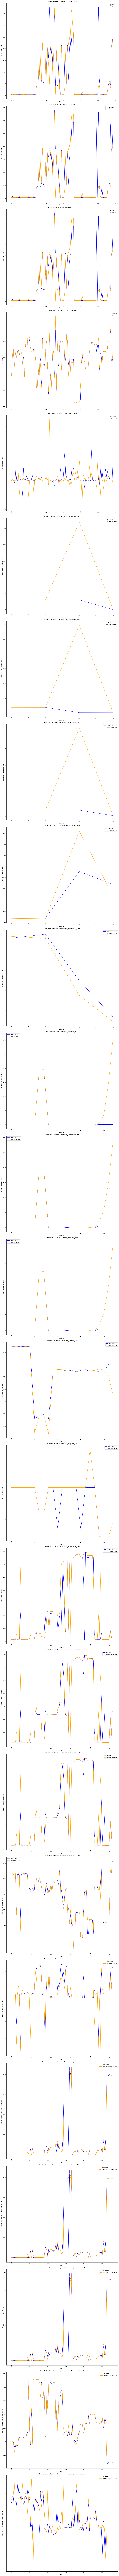

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to hold the predicted and actual values for each model
preds_actual_dict = {}

# Iterate over the models
for device, cols in output_cols.items():
    for i in range(len(cols)):
        # Get the predicted and actual values for the current model
        predictions_device = predictions[device + '_' + str(i)]
        preds = predictions_device.select('prediction').toPandas()
        actual_values = predictions_device.select(cols[i]).toPandas()

        # Add the predicted and actual values to the dictionary
        preds_actual_dict[device + '_' + cols[i]] = (preds, actual_values)

# Create subplots for all the models
fig, axes = plt.subplots(len(preds_actual_dict), 1, figsize=(14, 12 * len(preds_actual_dict)))

# Iterate over the dictionary and plot the test values vs predicted values for each model
for i, (model_name, (preds, actual_values)) in enumerate(preds_actual_dict.items()):
    ax = axes[i] if len(preds_actual_dict) > 1 else axes

    # Plot predicted values
    preds.plot(ax=ax, label='Predicted',color='blue')

    # Plot actual values
    actual_values.plot(ax=ax, label='Actual',color = 'orange')

    # Set the plot labels
    ax.set_xlabel('Data Point')
    ax.set_ylabel(model_name)
    ax.set_title('Predicted vs Actual - ' + model_name)
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [21]:
input_cols = {
    'fridge': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'dishwasher': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'hotplate': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'microwave': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'washing_machine': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA'],
    'water_heater': ['aggregated_pwrA', 'aggregated_apwrA', 'aggregated_curA', 'aggregated_vltA', 'aggregated_screA']
}

output_cols = {
    'fridge': ['fridge_pwrA', 'fridge_apwrA', 'fridge_curA', 'fridge_vltA', 'fridge_screA'],
    'dishwasher': ['dishwasher_pwrA', 'dishwasher_apwrA', 'dishwasher_curA', 'dishwasher_vltA', 'dishwasher_screA'],
    'hotplate': ['hotplate_pwrA', 'hotplate_apwrA', 'hotplate_curA', 'hotplate_vltA', 'hotplate_screA'],
    'microwave': ['microwave_pwrA', 'microwave_apwrA', 'microwave_curA', 'microwave_vltA', 'microwave_screA'],
    'washing_machine': ['washing_machine_pwrA', 'washing_machine_apwrA', 'washing_machine_curA', 'washing_machine_vltA', 'washing_machine_screA'],
    'water_heater': ['water_heater_pwrA', 'water_heater_apwrA', 'water_heater_curA', 'water_heater_vltA', 'water_heater_screA']
}

# time for water heater
device = 'water_heater'

# Get the input and output column names for the current device (water heater)
input_cols_device = input_cols[device]
output_cols_device = output_cols[device]

# Get the DataFrame for the current device
df = globals()[device + '_data']

# Split the dataset into train and test sets for water heater
train_ratio = 0.8
train_df, test_df = df.randomSplit([train_ratio, 1 - train_ratio], seed=42)

# Create empty dictionaries to hold the pipeline models and predictions for the device
# Create empty dictionary to hold the pipeline models for the device
pipeline_models_heater = {}

for i in range(len(output_cols_device)):
    # Create vector assembler for input columns
    assembler = VectorAssembler(inputCols=input_cols_device, outputCol='features')

    # Create scaler
    scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

    # Create GBT regressor
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_cols_device[i], maxIter=5, maxDepth=10)

    # Create pipeline
    pipeline_heater = Pipeline(stages=[assembler, scaler, gbt])

    # Fit pipeline on the train set
    pipeline_model_heater = pipeline_heater.fit(train_df)

    # Make predictions on the test set
    predictions_device = pipeline_model_heater.transform(test_df)

    # Add pipeline model to dictionary with a unique key
    pipeline_models_heater[device + '_' + str(i)] = pipeline_model_heater

    # Evaluate the model on the predicted column
    evaluator = RegressionEvaluator(labelCol=output_cols_device[i], predictionCol='prediction', metricName='rmse')
    rmse = evaluator.evaluate(predictions_device)
    mse = evaluator.evaluate(predictions_device, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions_device, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions_device, {evaluator.metricName: 'r2'})
    
    # Print the evaluation metrics
    print(f"Metrics for {output_cols_device[i]}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()


Metrics for water_heater_pwrA:
RMSE: 154.1023193578885
MSE: 23747.524831480652
MAE: 13.903195289503625
R2: 0.9165945476793645



Metrics for water_heater_apwrA:
RMSE: 155.87589579939947
MSE: 24297.294891265243
MAE: 14.282602296259896
R2: 0.9145896607878687



Metrics for water_heater_curA:
RMSE: 0.706603817353383
MSE: 0.499288954698373
MAE: 0.06477520886377523
R2: 0.9154602670974095



Metrics for water_heater_vltA:
RMSE: 0.15842116360057568
MSE: 0.025097265076560366
MAE: 0.09241247963259533
R2: 0.9957705951971533



Metrics for water_heater_screA:
RMSE: 0.4975385646591067
MSE: 0.24754462332304408
MAE: 0.3777758016735134
R2: 0.02908624490056



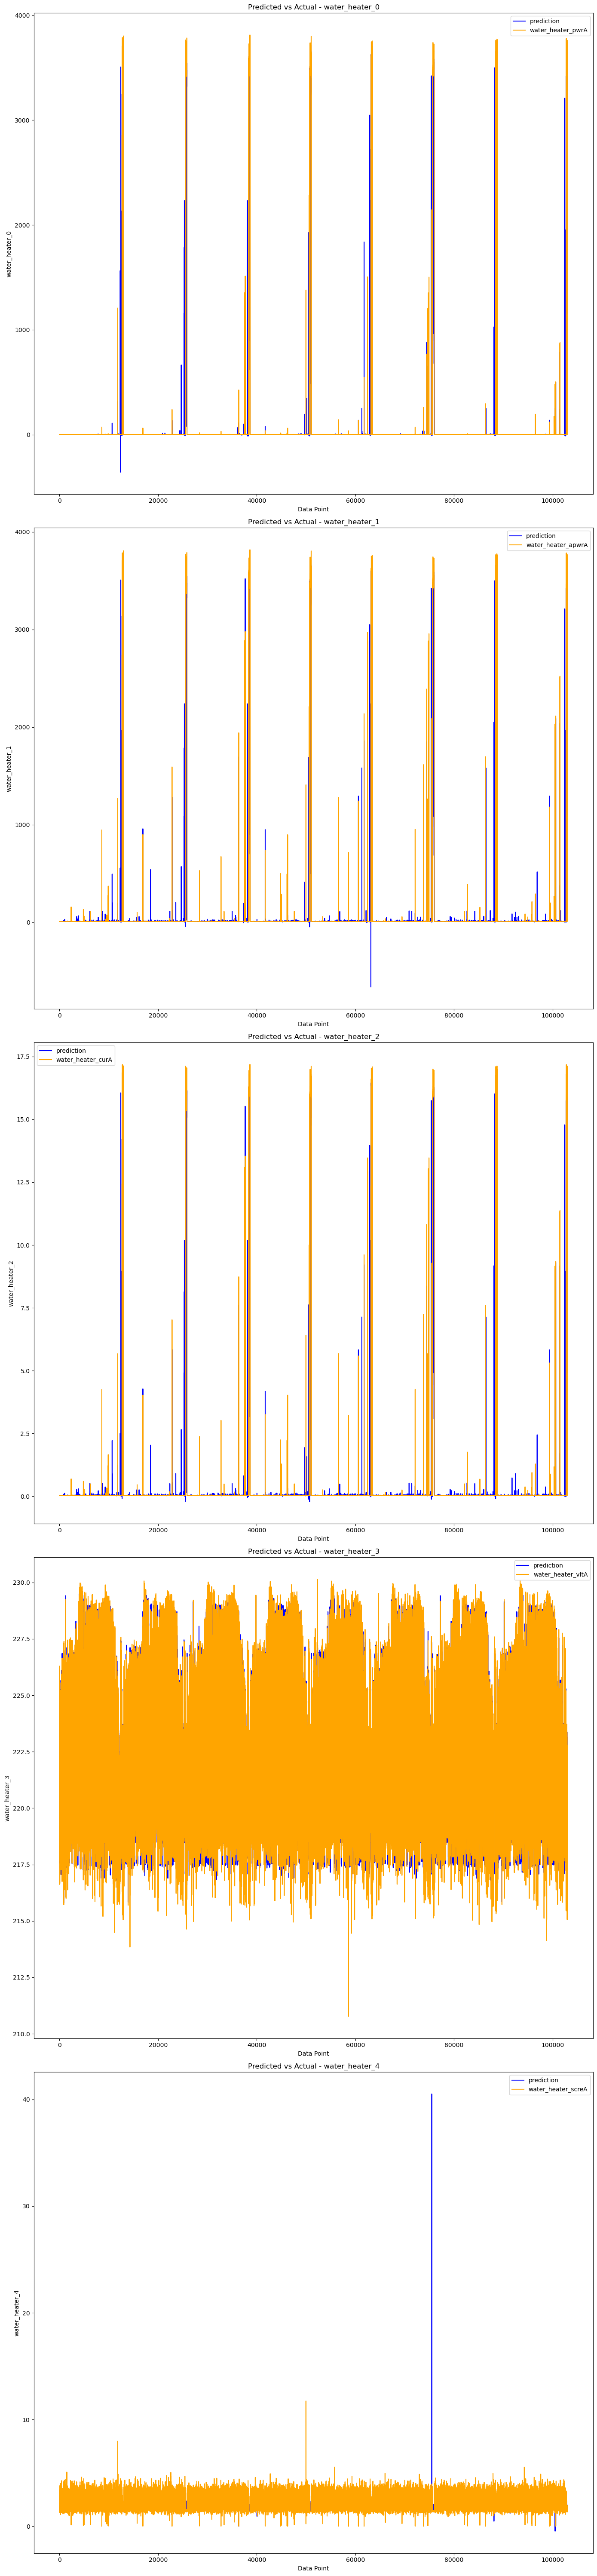

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to hold the predicted and actual values for the water_heater device
preds_actual_dict = {}

# Iterate over the output columns of the water_heater device
for i in range(len(output_cols['water_heater'])):
    # Get the predicted and actual values for the current model
    predictions_device = pipeline_models_heater['water_heater_' + str(i)].transform(test_df)
    preds = predictions_device.select('prediction').toPandas()
    actual_values = predictions_device.select(output_cols['water_heater'][i]).toPandas()

    # Add the predicted and actual values to the dictionary
    preds_actual_dict['water_heater_' + str(i)] = (preds, actual_values)

# Create subplots for all the features of the water_heater device
fig, axes = plt.subplots(len(preds_actual_dict), 1, figsize=(14, 12 * len(preds_actual_dict)))

# Iterate over the dictionary and plot the test values vs predicted values for each feature
for i, (model_name, (preds, actual_values)) in enumerate(preds_actual_dict.items()):
    ax = axes[i] if len(preds_actual_dict) > 1 else axes

    # Plot predicted values
    preds.plot(ax=ax, label='Predicted', color='blue')

    # Plot actual values
    actual_values.plot(ax=ax, label='Actual', color='orange')

    # Set the plot labels
    ax.set_xlabel('Data Point')
    ax.set_ylabel(model_name)
    ax.set_title('Predicted vs Actual - ' + model_name)
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
